In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
### dataset 1
df_ai = pd.read_csv("./DATA/output/output/dataset1-DSA/metricsBertBleuRouge.csv")
### dataset 2
df_security = pd.read_csv("./DATA/output/output/dataset2-DSB/metricsBertBleuRouge.csv")
### LLM Dataset-Benchmark Results
df_llm_metrics2 = pd.read_csv('./LLMs-Overview2-Paper-Sheet4.csv')

### Inspect Data

In [4]:
df_security.head(2)

,question,answer,contexts,ground_truth,model,context_precision,faithfulness,answer_relevancy,context_recall,answer_correctness,answer_similarity,concatenated_contexts,BLEUScore,ROUGEScore,BERTScore
0,How do LLMs' attention limits affect their rol...,"LLMs, particularly in the context of dynamic s...",['operations. We then execute the suggested op...,"LLMs typically lack situational awareness, whi...",lucataco/qwen1.5-7b,1.0,0.8,0.766865,1.0,0.435348,0.741392,operations. We then execute the suggested oper...,0.010242,0.315152,0.889944
1,What is the performance of PENTESTGPT in the p...,"In the picoMini CTF competition, PENTESTGPT ma...","['benchmarks. For this analysis, we deploy PEN...",PENTESTGPT's performance in the picoMini CTF c...,lucataco/qwen1.5-7b,0.0,1.0,0.829607,0.5,0.254707,0.768829,"benchmarks. For this analysis, we deploy PENTE...",0.000097,0.082192,0.811086


In [5]:
df_ai.head(2)

,question,answer,contexts,ground_truth,model,context_precision,faithfulness,answer_relevancy,context_recall,answer_correctness,answer_similarity,concatenated_contexts,BLEUScore,ROUGEScore,BERTScore
0,What computational approach does PAL use to in...,PAL uses an approach that combines a large lan...,['PAL: Program-aided Language Models\nLuyu Gao...,PAL leverages large language models (LLMs) to ...,lucataco/qwen1.5-7b,1.0,1.0,0.712241,1.000000,0.724417,0.897670,PAL: Program-aided Language Models\nLuyu Gao* ...,0.059525,0.320988,0.912698
1,How does LLaMA's training data preprocessing a...,LLaMA's training data preprocessing and mixtur...,['LLaMA: Open and Efﬁcient Foundation Language...,LLaMA's training data includes a mixture of so...,lucataco/qwen1.5-7b,0.0,1.0,1.000000,0.333333,0.510929,0.843718,LLaMA: Open and Efﬁcient Foundation Language M...,0.022909,0.243902,0.853357


In [6]:
df_llm_metrics2.head(2)

,Raw model,Model,Company,# Parameter,Context Size,Average ⬆️,IFEval,BBH,MATH Lvl 5,GPQA,MUSR,MMLU-PRO,Type
0,"0: {model: 'meta-llama-3-70b-instruct', runs: ...",meta-llama-3-70b-instruct,Facebook,70.0,8.0,36.18,80.99,50.19,23.34,4.92,10.92,46.74,"💬 chat models (RLHF, DPO, IFT, ...)"
1,"1: {model: 'meta-llama-3-8b', runs: 48900000}",meta-llama-3-8b,Facebook,8.0,8.0,13.41,14.55,24.50,3.25,7.38,6.24,24.55,🟢 pretrained


### Preprocessing Data

In [7]:
df_llm_metrics2.dropna(inplace=True)

df_security[['provider','Model']] = df_security['model'].str.split('/',expand=True)
df_ai[['provider','Model']] = df_ai['model'].str.split('/',expand=True)

df_llm_metrics2.replace('💬 chat models (RLHF, DPO, IFT, ...)', 'instruct', inplace=True)
df_llm_metrics2.replace('🔶 fine-tuned on domain-specific datasets', 'dsds fine-tuned', inplace=True)
df_llm_metrics2.replace('🟢 pretrained', 'pretrained', inplace=True)

In [8]:
df_llm_metrics2[["# Parameter",	"Context Size",	"IFEval",	"BBH",	"MATH Lvl 5",	"GPQA",	"MUSR",	"MMLU-PRO"]]

,# Parameter,Context Size,IFEval,BBH,MATH Lvl 5,GPQA,MUSR,MMLU-PRO
0,70.0,8.0,80.99,50.19,23.34,4.92,10.92,46.74
1,8.0,8.0,14.55,24.50,3.25,7.38,6.24,24.55
2,8.0,8.0,74.08,28.24,8.69,1.23,1.60,29.60
3,56.0,32.0,53.95,34.02,9.06,7.61,12.11,29.36
4,7.0,4.0,39.65,4.49,0.68,0.56,3.48,7.52
5,70.0,4.0,49.58,4.61,0.91,1.90,3.48,15.92
6,13.0,4.0,39.85,7.16,0.60,0.00,8.16,10.26
7,7.0,8.0,54.96,22.91,2.64,3.47,7.61,19.08
8,7.0,8.0,23.86,22.02,2.49,5.59,10.68,22.36
9,7.0,8.0,45.02,13.79,1.51,0.00,5.77,15.34


### Analyse the Correlation between Dataset Features

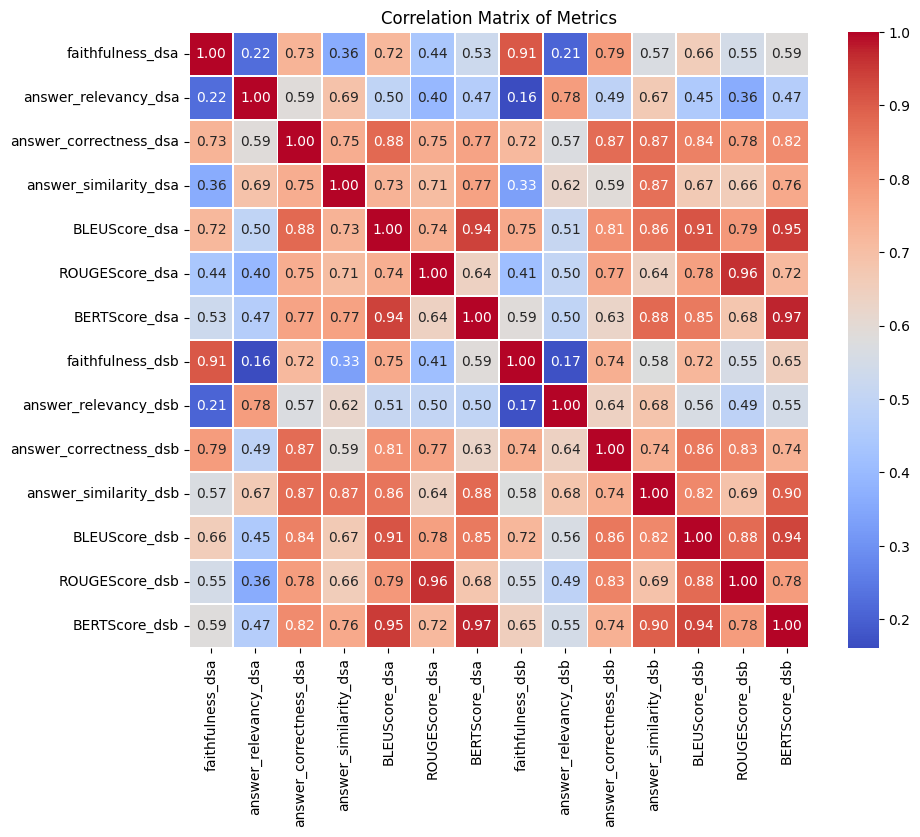

In [9]:
features = ['faithfulness', 'answer_relevancy', 'answer_correctness', 'answer_similarity', 'BLEUScore', 'ROUGEScore','BERTScore']

dfai_a = df_ai.groupby('Model')[features].mean()#.reset_index()
dfs_b = df_security.groupby('Model')[features].mean()#.reset_index()

df_abc = pd.merge(dfai_a, dfs_b, left_index=True, right_index=True, suffixes=('_dsa', '_dsb'))#.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_abc.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, xticklabels=df_abc.columns, yticklabels=df_abc.columns, 
            cbar_kws={'orientation': 'vertical'})
#plt.xticks(rotation=45, ha='right', fontsize=10)
#plt.yticks(rotation=45, ha='right', fontsize=10)

plt.savefig('./correlation_matrix_all.pdf', format='pdf', bbox_inches='tight')

plt.title('Correlation Matrix of Metrics')
plt.show()

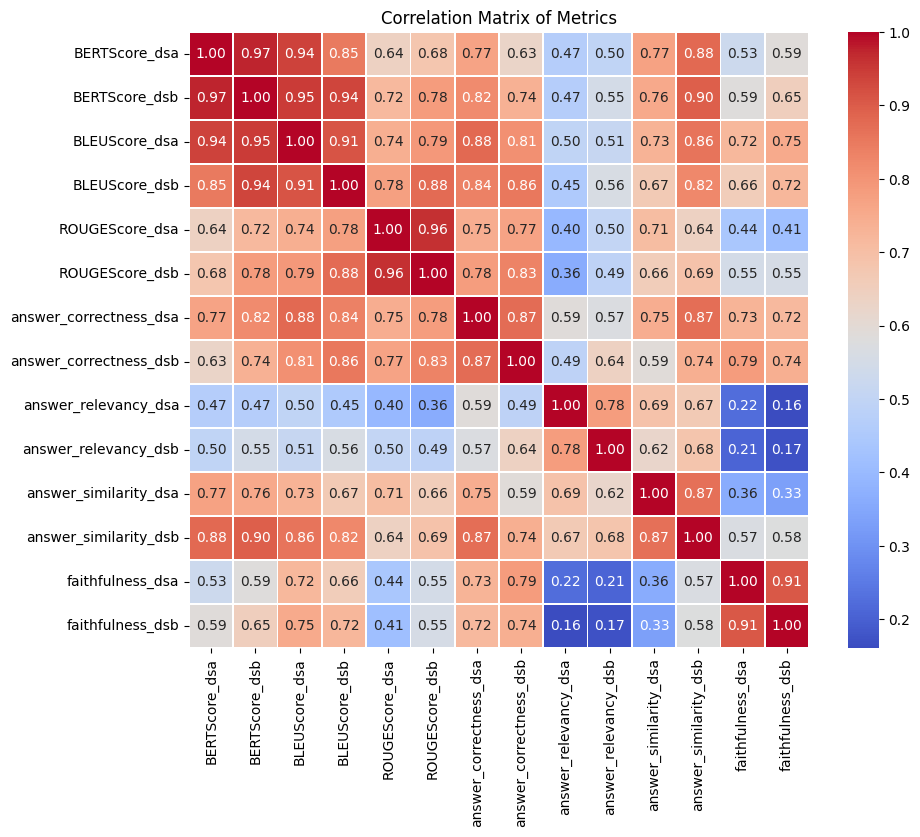

In [10]:
# Calculate the correlation matrix
corr_matrix = df_abc.corr()

# Sort the correlation matrix so that *_dsa columns are next to *_dsb columns
sorted_columns = [col for pair in zip(
    sorted([col for col in corr_matrix.columns if col.endswith('_dsa')]),
    sorted([col for col in corr_matrix.columns if col.endswith('_dsb')])
) for col in pair]

corr_matrix_sorted = corr_matrix.reindex(sorted_columns, axis=0).reindex(sorted_columns, axis=1)

# Plotting the sorted correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_sorted, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            xticklabels=corr_matrix_sorted.columns, yticklabels=corr_matrix_sorted.columns, 
            cbar_kws={'orientation': 'vertical'})

plt.savefig('./correlation_matrix_all2.pdf', format='pdf', bbox_inches='tight')
plt.title('Correlation Matrix of Metrics')
plt.show()

In [11]:
df_abc.columns

Index(['faithfulness_dsa', 'answer_relevancy_dsa', 'answer_correctness_dsa',
       'answer_similarity_dsa', 'BLEUScore_dsa', 'ROUGEScore_dsa',
       'BERTScore_dsa', 'faithfulness_dsb', 'answer_relevancy_dsb',
       'answer_correctness_dsb', 'answer_similarity_dsb', 'BLEUScore_dsb',
       'ROUGEScore_dsb', 'BERTScore_dsb'],
      dtype='object')

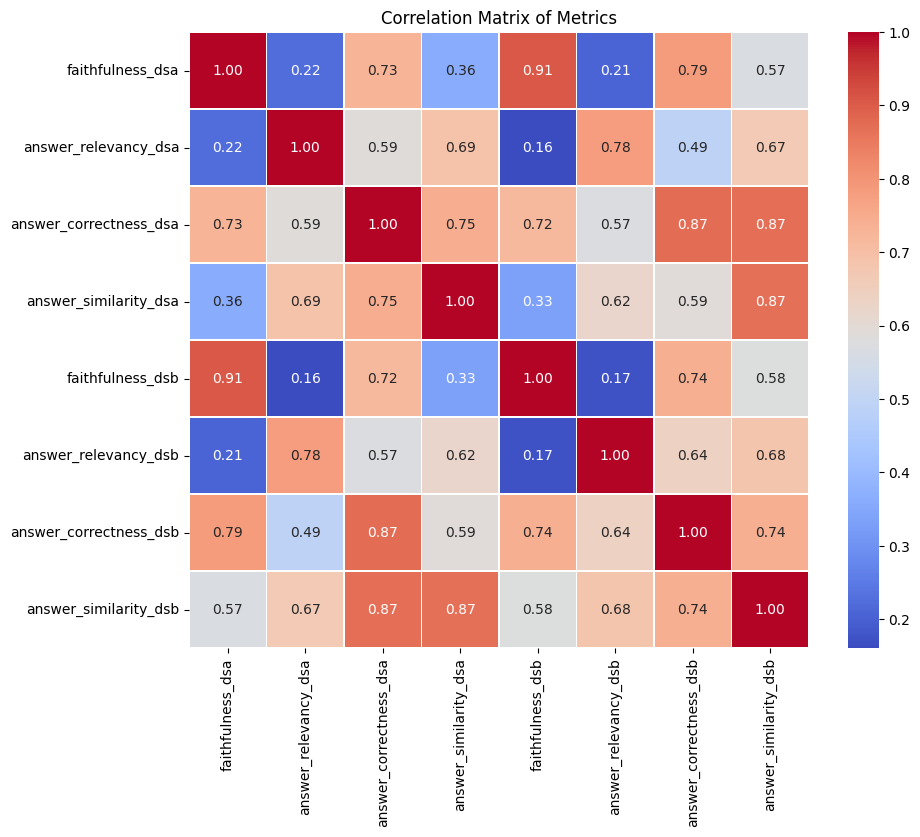

In [12]:
# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_abc[['faithfulness_dsa', 'answer_relevancy_dsa', 'answer_correctness_dsa',
       'answer_similarity_dsa', 'faithfulness_dsb', 'answer_relevancy_dsb',
       'answer_correctness_dsb', 'answer_similarity_dsb']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Metrics')

# Save the plot as a PDF file
plt.savefig('./correlation_matrix1.pdf', format='pdf', bbox_inches='tight')

plt.show()

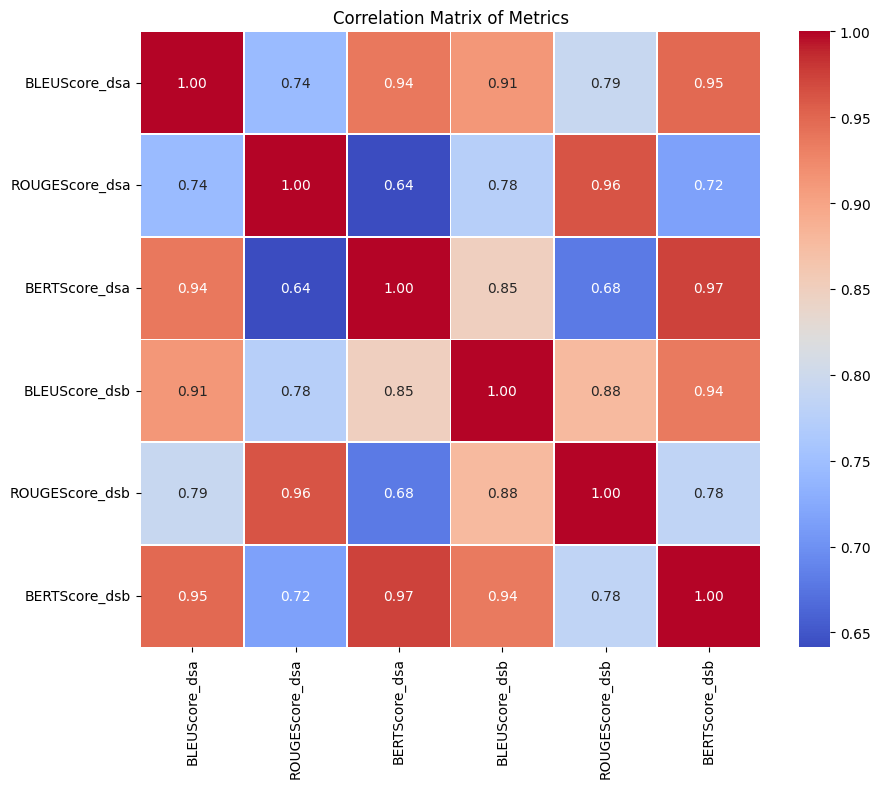

In [13]:
# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_abc[[ 'BLEUScore_dsa', 'ROUGEScore_dsa',
       'BERTScore_dsa', 'BLEUScore_dsb',
       'ROUGEScore_dsb', 'BERTScore_dsb']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Metrics')
plt.show()

### Inspect dataset A (DSA) & dataset B (DSB) feature correlation

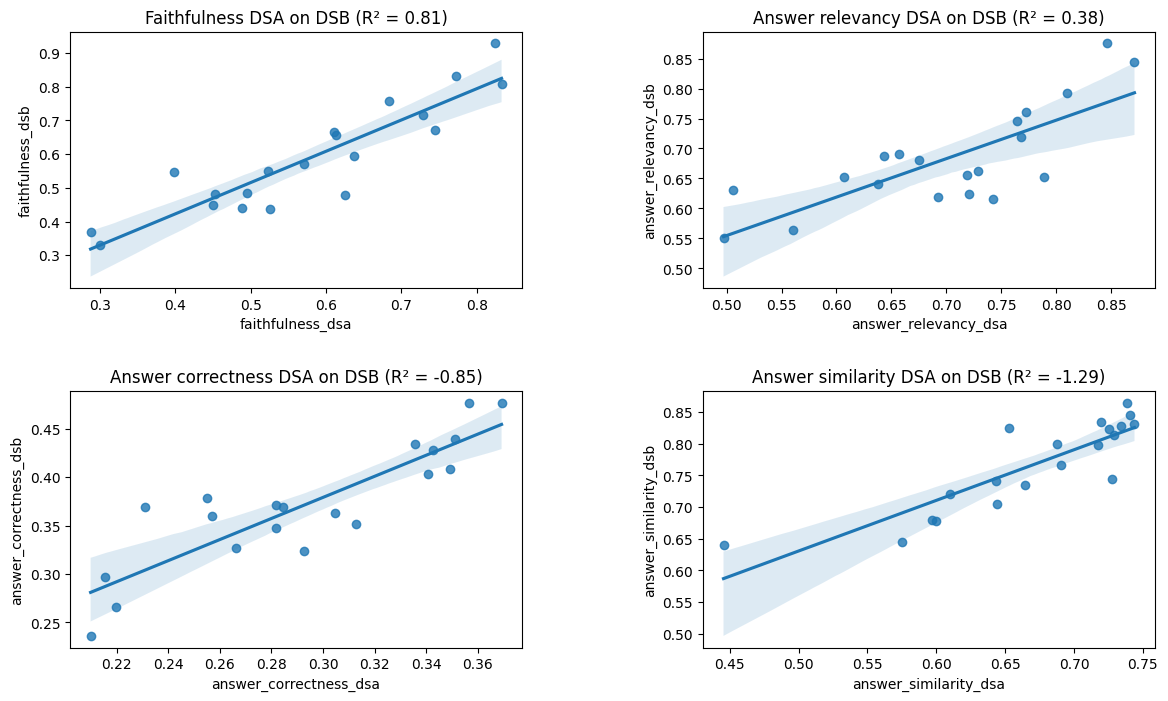

In [14]:
# Sample DataFrame for demonstration
# df_abc = sns.load_dataset('example_dataset')
from sklearn.metrics import r2_score

# Create a figure with 4 subplots arranged in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Adjust the subplot layout
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Create the first scatterplot
sns.regplot(data=df_abc, x='faithfulness_dsa', y='faithfulness_dsb', ax=axs[0, 0])
r2_1 = r2_score(df_abc['faithfulness_dsb'], df_abc['faithfulness_dsa'])
axs[0, 0].set_title(f'Faithfulness DSA on DSB (R² = {r2_1:.2f})')

# Create the second scatterplot
sns.regplot(data=df_abc, x='answer_relevancy_dsa', y='answer_relevancy_dsb', ax=axs[0, 1])
r2_2 = r2_score(df_abc['answer_relevancy_dsb'], df_abc['answer_relevancy_dsa'])
axs[0, 1].set_title(f'Answer relevancy DSA on DSB (R² = {r2_2:.2f})')

# Create the third scatterplot
sns.regplot(data=df_abc, x='answer_correctness_dsa', y='answer_correctness_dsb', ax=axs[1, 0])
r2_3 = r2_score(df_abc['answer_correctness_dsb'], df_abc['answer_correctness_dsa'])
axs[1, 0].set_title(f'Answer correctness DSA on DSB (R² = {r2_3:.2f})')

# Create the fourth scatterplot
sns.regplot(data=df_abc, x='answer_similarity_dsa', y='answer_similarity_dsb', ax=axs[1, 1])
r2_4 = r2_score(df_abc['answer_similarity_dsb'], df_abc['answer_similarity_dsa'])
axs[1, 1].set_title(f'Answer similarity DSA on DSB (R² = {r2_4:.2f})')

# Display the plots
plt.show()

### Construct RAGAs score metric

In [60]:
df_a_metrics = df_ai.groupby('Model')[features].mean()
df_b_metrics = df_security.groupby('Model')[features].mean()

df_a_metrics["RAGAS"] = (1/4)*df_a_metrics["faithfulness"] + (1/4)*df_a_metrics["answer_relevancy"] + (1/4)*df_a_metrics["answer_correctness"] + (1/4)*df_a_metrics["answer_similarity"]
df_b_metrics["RAGAS"] = (1/4)*df_b_metrics["faithfulness"] + (1/4)*df_b_metrics["answer_relevancy"] + (1/4)*df_b_metrics["answer_correctness"] + (1/4)*df_b_metrics["answer_similarity"]

df_a_metrics.drop(["faithfulness", "answer_relevancy", "answer_correctness", "answer_similarity"], axis=1, inplace=True)
df_b_metrics.drop(["faithfulness", "answer_relevancy", "answer_correctness", "answer_similarity"], axis=1, inplace=True)

### Rename Columns

In [61]:
df_a_metrics.rename(columns={'BLEUScore': 'BLEU', 'ROUGEScore': 'ROUGE', 'BERTScore': 'BERT'}, inplace=True)
df_b_metrics.rename(columns={'BLEUScore': 'BLEU', 'ROUGEScore': 'ROUGE', 'BERTScore': 'BERT'}, inplace=True)

In [62]:
df_a_metrics.head(2)

,BLEU,ROUGE,BERT,RAGAS
Model,,,,
gemma-2b,0.010580,0.196961,0.833679,0.493228
gemma-2b-it,0.034342,0.217721,0.872908,0.601041


In [63]:
df_b_metrics.head(2)

,BLEU,ROUGE,BERT,RAGAS
Model,,,,
gemma-2b,0.080918,0.313120,0.851956,0.554404
gemma-2b-it,0.150046,0.384796,0.891509,0.661634


In [64]:
### round to 3 decimal places
df_a_metrics = round(df_a_metrics,3)
df_b_metrics = round(df_b_metrics,3)

### Dataframe A Statistics

In [81]:
# Rank each metric in descending order
df_ranks = df_a_metrics.rank(ascending=False, method='first')

# Convert the ranks to integers for display
df_ranks_a = df_ranks.astype(int)

df_ranks_a = df_ranks_a.loc[df_a_metrics.index]

# Convert scores and ranks to strings for concatenation
df_combined = df_a_metrics.astype(str) + ' (' + df_ranks_a.astype(str) + ')'

# Calculate the average rank for each model
df_ranks['average'] = df_ranks_a.mean(axis=1)

# Add the average rank column to the combined DataFrame
df_combined['average'] = df_ranks['average']

# Sort the DataFrame based on the average rank
df_sorted_a = df_combined.sort_values('average')

# Display the result
df_sorted_a

,BLEU,ROUGE,BERT,RAGAS,average
Model,,,,,
nous-hermes-2-solar-10.7b,0.038 (1),0.231 (2),0.872 (5),0.677 (1),2.25
qwen1.5-14b,0.036 (2),0.219 (4),0.875 (1),0.646 (3),2.50
mistral-7b-instruct-v0.1,0.032 (4),0.246 (1),0.873 (2),0.639 (5),3.00
qwen1.5-7b,0.032 (4),0.216 (6),0.873 (2),0.649 (2),3.50
gemma-2b-it,0.034 (3),0.218 (5),0.873 (2),0.601 (8),4.50
mixtral-8x7b-instruct-v0.1,0.031 (6),0.221 (3),0.866 (6),0.64 (4),4.75
meta-llama-3-70b-instruct,0.03 (7),0.207 (8),0.865 (7),0.629 (6),7.00
mistral-7b-instruct-v0.2,0.023 (9),0.216 (6),0.862 (8),0.56 (10),8.25
llama-2-70b-chat,0.026 (8),0.203 (10),0.859 (9),0.61 (7),8.50


In [67]:
#df_ranks_a#.sort_values('average')

### Dataframe B Statistics

In [69]:
# Rank each metric in descending order
df_ranks = df_b_metrics.rank(ascending=False , method='first')

# Convert the ranks to integers for display
df_ranks_b = df_ranks.astype(int)

df_ranks_b = df_ranks_b.loc[df_b_metrics.index]

# Convert scores and ranks to strings for concatenation
df_combined = df_b_metrics.astype(str) + ' (' + df_ranks_b.astype(str) + ')'

# Calculate the average rank for each model
df_ranks_b['average'] = df_ranks_b.mean(axis=1)

# Add the average rank column to the combined DataFrame
df_combined['average'] = df_ranks_b['average']

# Sort the DataFrame based on the average rank
df_sorted_b = df_combined.sort_values('average')

# Display the result
df_sorted_b

,BLEU,ROUGE,BERT,RAGAS,average
Model,,,,,
mistral-7b-instruct-v0.1,0.201 (1),0.405 (1),0.896 (1),0.716 (2),1.25
meta-llama-3-70b-instruct,0.187 (2),0.397 (2),0.89 (3),0.71 (3),2.50
nous-hermes-2-solar-10.7b,0.179 (3),0.379 (4),0.89 (4),0.726 (1),3.00
gemma-2b-it,0.15 (4),0.385 (3),0.892 (2),0.662 (7),4.00
qwen1.5-7b,0.126 (6),0.332 (6),0.883 (5),0.672 (5),5.50
mixtral-8x7b-instruct-v0.1,0.136 (5),0.345 (5),0.879 (7),0.671 (6),5.75
qwen1.5-14b,0.112 (7),0.325 (7),0.882 (6),0.693 (4),6.00
mistral-7b-instruct-v0.2,0.097 (9),0.314 (9),0.875 (8),0.629 (8),8.50
llama-2-70b-chat,0.101 (8),0.301 (11),0.871 (9),0.59 (10),9.50


In [42]:
top_LLMs = ['nous-hermes-2-solar-10.7b', 'mistral-7b-instruct-v0.1', 'qwen1.5-7b', 'gemma-2b-it']
bottom_LLMs = ['yi-6b', 'mistral-7b-v0.1', 'yi-6b-chat', 'gemma-7b-it']

### Rank Correlation

In [71]:
from scipy.stats import spearmanr

# Merge the DataFrames to align the models
df_combined_rank = pd.merge(df_ranks_a, df_ranks_b, on='Model', suffixes=('_DSA', '_DSB'))

# Compute Spearman's rank correlation for each metric
for metric in ['BLEU', 'ROUGE', 'BERT', 'RAGAS']:
    correlation, p_value = spearmanr(df_combined_rank[f'{metric}_DSA'], df_combined_rank[f'{metric}_DSB'])
    print(f"Spearman's rank correlation for {metric}: {correlation:.2f} (p-value: {p_value:.4f})")

Spearman's rank correlation for BLEU: 0.93 (p-value: 0.0000)
Spearman's rank correlation for ROUGE: 0.94 (p-value: 0.0000)
Spearman's rank correlation for BERT: 0.95 (p-value: 0.0000)
Spearman's rank correlation for RAGAS: 0.91 (p-value: 0.0000)


### Merge Dataframe A, Dataframe B & Benchmark Dataframe

In [72]:
df_ab_metrics = pd.merge(df_a_metrics, df_b_metrics, left_index=True, right_index=True, suffixes=('_dsa', '_dsb'))

In [73]:
df_ab_metrics.head()

,BLEU_dsa,ROUGE_dsa,BERT_dsa,RAGAS_dsa,BLEU_dsb,ROUGE_dsb,BERT_dsb,RAGAS_dsb
Model,,,,,,,,
gemma-2b,0.011,0.197,0.834,0.493,0.081,0.313,0.852,0.554
gemma-2b-it,0.034,0.218,0.873,0.601,0.150,0.385,0.892,0.662
gemma-7b,0.013,0.205,0.842,0.481,0.081,0.316,0.861,0.557
gemma-7b-it,0.002,0.025,0.815,0.459,0.003,0.046,0.825,0.540
llama-2-13b-chat,0.016,0.173,0.847,0.590,0.072,0.270,0.861,0.593


In [74]:
df_llm_metrics2.index = df_llm_metrics2.Model
df_llm_metrics2.drop(["Model","Raw model","Average ⬆️"], axis=1, inplace=True)

In [75]:
df_ab_metrics

,BLEU_dsa,ROUGE_dsa,BERT_dsa,RAGAS_dsa,BLEU_dsb,ROUGE_dsb,BERT_dsb,RAGAS_dsb
Model,,,,,,,,
gemma-2b,0.011,0.197,0.834,0.493,0.081,0.313,0.852,0.554
gemma-2b-it,0.034,0.218,0.873,0.601,0.150,0.385,0.892,0.662
gemma-7b,0.013,0.205,0.842,0.481,0.081,0.316,0.861,0.557
gemma-7b-it,0.002,0.025,0.815,0.459,0.003,0.046,0.825,0.540
llama-2-13b-chat,0.016,0.173,0.847,0.590,0.072,0.270,0.861,0.593
llama-2-70b-chat,0.026,0.203,0.859,0.610,0.101,0.301,0.871,0.590
llama-2-7b-chat,0.016,0.178,0.849,0.525,0.064,0.259,0.856,0.540
meta-llama-3-70b,0.008,0.177,0.814,0.508,0.042,0.256,0.833,0.566
meta-llama-3-70b-instruct,0.030,0.207,0.865,0.629,0.187,0.397,0.890,0.710


In [76]:
df_ab_metrics_full = pd.merge(df_ab_metrics, df_llm_metrics2, left_index=True, right_index=True)
df_ab_metrics_full

,BLEU_dsa,ROUGE_dsa,BERT_dsa,RAGAS_dsa,BLEU_dsb,ROUGE_dsb,BERT_dsb,RAGAS_dsb,Company,# Parameter,Context Size,IFEval,BBH,MATH Lvl 5,GPQA,MUSR,MMLU-PRO,Type
Model,,,,,,,,,,,,,,,,,,
gemma-2b,0.011,0.197,0.834,0.493,0.081,0.313,0.852,0.554,Google,2.0,8.0,20.38,8.25,2.72,0.67,7.56,4.06,pretrained
gemma-2b-it,0.034,0.218,0.873,0.601,0.150,0.385,0.892,0.662,Google,2.0,8.0,26.90,5.21,0.45,3.80,3.03,3.92,instruct
gemma-7b,0.013,0.205,0.842,0.481,0.081,0.316,0.861,0.557,Google,7.0,8.0,26.59,21.12,6.42,4.92,10.98,21.64,pretrained
gemma-7b-it,0.002,0.025,0.815,0.459,0.003,0.046,0.825,0.540,Google,7.0,8.0,38.68,11.94,1.59,4.59,12.53,7.72,instruct
llama-2-13b-chat,0.016,0.173,0.847,0.590,0.072,0.270,0.861,0.593,Facebook,13.0,4.0,39.85,7.16,0.60,0.00,8.16,10.26,instruct
llama-2-70b-chat,0.026,0.203,0.859,0.610,0.101,0.301,0.871,0.590,Facebook,70.0,4.0,49.58,4.61,0.91,1.90,3.48,15.92,instruct
llama-2-7b-chat,0.016,0.178,0.849,0.525,0.064,0.259,0.856,0.540,Facebook,7.0,4.0,39.65,4.49,0.68,0.56,3.48,7.52,instruct
meta-llama-3-70b,0.008,0.177,0.814,0.508,0.042,0.256,0.833,0.566,Facebook,70.0,8.0,16.03,48.71,16.54,19.69,16.01,41.21,pretrained
meta-llama-3-70b-instruct,0.030,0.207,0.865,0.629,0.187,0.397,0.890,0.710,Facebook,70.0,8.0,80.99,50.19,23.34,4.92,10.92,46.74,instruct


### PCA with Loadings - Plot

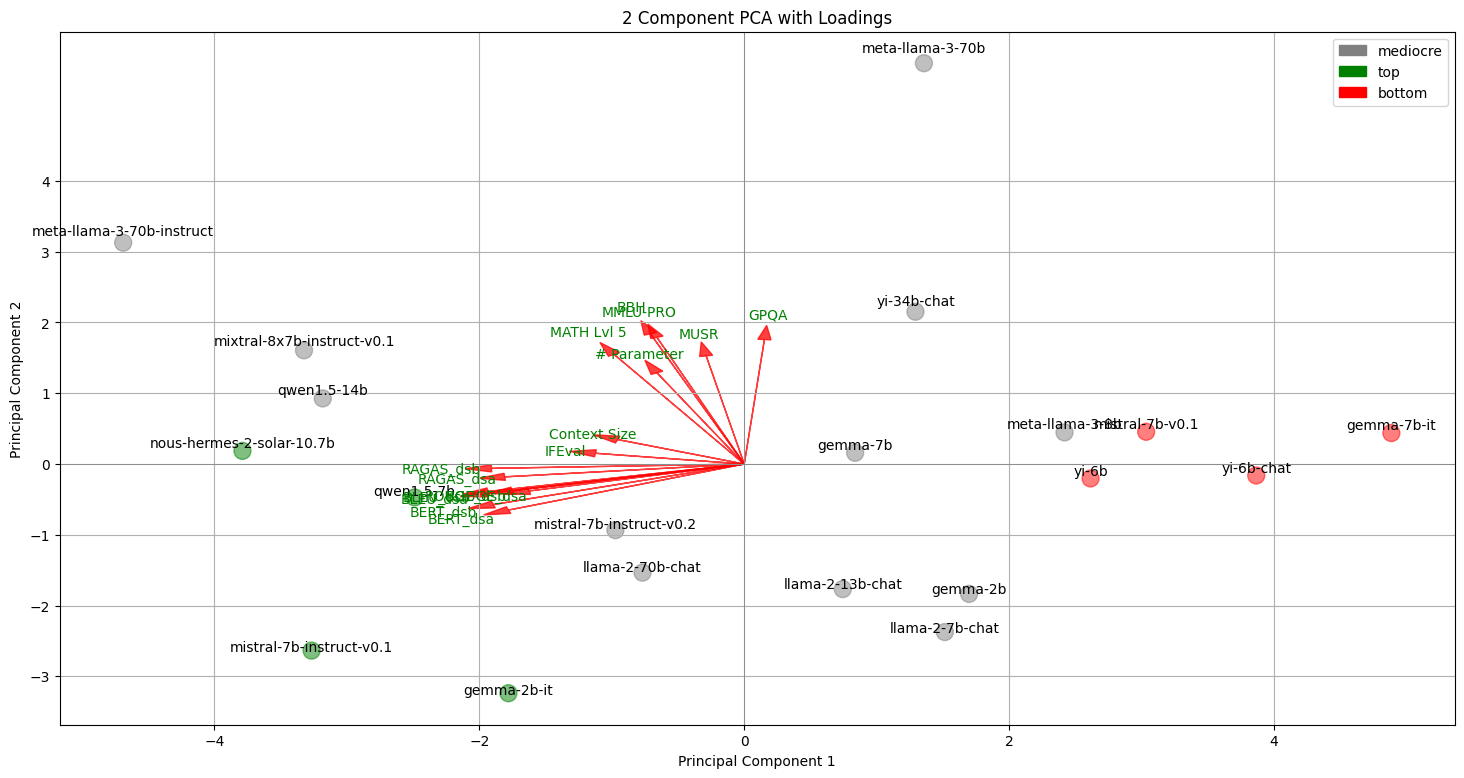

   Explained Variance
0            0.467796
1            0.261458


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.patches as mpatches

# Example DataFrame

# df_ab_metrics_full = pd.DataFrame(data, index=index)

# Drop any non-numeric columns for PCA
numeric_data = pd.get_dummies(df_ab_metrics_full[['# Parameter', 'Context Size', 'IFEval', 'BBH', 'MATH Lvl 5',
       'GPQA', 'MUSR', 'MMLU-PRO', 'BLEU_dsa', 'ROUGE_dsa', 'BERT_dsa', 'RAGAS_dsa', 'BLEU_dsb', 'ROUGE_dsb', 'BERT_dsb', 'RAGAS_dsb']])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the 2 principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'], index=numeric_data.index)

# Define a dictionary to map specific models to colors
model_colors = {
    'gemma-2b': 'grey',
    'gemma-2b-it': 'green',
    'gemma-7b': 'grey',
    'gemma-7b-it': 'red',
    'llama-2-13b-chat': 'grey',
    'llama-2-70b-chat': 'grey',
    'llama-2-7b-chat': 'grey',
    'meta-llama-3-70b': 'grey',
    'meta-llama-3-70b-instruct': 'grey',
    'meta-llama-3-8b': 'grey',
    'mistral-7b-instruct-v0.1': 'green',
    'mistral-7b-instruct-v0.2': 'grey',
    'mistral-7b-v0.1': 'red',
    'mixtral-8x7b-instruct-v0.1': 'grey',
    'nous-hermes-2-solar-10.7b': 'green',
    'qwen1.5-14b': 'grey',
    'qwen1.5-7b': 'green',
    'yi-34b-chat': 'grey',
    'yi-6b': 'red',
    'yi-6b-chat': 'red',
}

# Create a color list based on the model_colors dictionary
colors = principal_df.index.map(model_colors)

# Plot the 2 principal components
plt.figure(figsize=(18, 9))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=colors, alpha=0.5, s=150)

# Annotate each point with its index, centered above the point
for i in principal_df.index:
    plt.annotate(i, (principal_df.loc[i, 'Principal Component 1'], principal_df.loc[i, 'Principal Component 2']*1.02),
                 ha='center', va='bottom')

# Plot the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
scaling_factor = 2  # Increase this factor to make the lines longer
for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    plt.arrow(0, 0, x * scaling_factor, y * scaling_factor, color='r', alpha=0.75, head_width=0.1, head_length=0.2)
    plt.text(x * scaling_factor * 1.2, y * scaling_factor * 1.2, numeric_data.columns[i], color='g', ha='center', va='center')

# Create custom legend
neutral_patch = mpatches.Patch(color='grey', label='mediocre')
top_performers_patch = mpatches.Patch(color='green', label='top')
bottom_performers_patch = mpatches.Patch(color='red', label='bottom')
plt.legend(handles=[neutral_patch, top_performers_patch, bottom_performers_patch])

plt.title('2 Component PCA with Loadings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set custom ticks on the Y-axis
y_ticks = np.arange(-3, 4.5, 1)  # Example: from -10 to 10 with step 2
plt.yticks(y_ticks)

# Set axis limits to ensure all points are visible
#plt.xlim([-6, 6])  # Adjust limits as needed
#plt.ylim([-6, 3])  # Adjust limits as needed

plt.grid()
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.savefig('./PCA.pdf', format='pdf', bbox_inches='tight')

#plt.savefig('./correlation_matrix1.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Show the explained variance by the 2 components
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])

print(explained_variance_df)


### Average Metrics by Top/Bottom Portfolios

In [35]:
df_ab_metrics_full['Performer'] = df_ab_metrics_full.index.map(lambda x: 'top' if x in top_LLMs else ('bottom' if x in bottom_LLMs else 'mediocre'))

In [36]:
df_ab_metrics_full.groupby(["Performer"])[['# Parameter', 'Context Size', 'IFEval', 'BBH', 'MATH Lvl 5',
       'GPQA', 'MUSR', 'MMLU-PRO']].mean()

,# Parameter,Context Size,IFEval,BBH,MATH Lvl 5,GPQA,MUSR,MMLU-PRO
Performer,,,,,,,,
bottom,6.500000,6.000000,31.355000,17.5925,1.5675,4.6700,8.455000,18.775000
mediocre,29.833333,10.666667,39.380833,24.4700,7.2450,5.7325,8.780833,23.673333
top,6.675000,13.000000,37.887500,19.2675,2.9075,4.0275,7.947500,16.965000


In [37]:
df_ab_metrics_full.groupby(["Performer"])[['# Parameter', 'Context Size', 'IFEval', 'BBH', 'MATH Lvl 5',
       'GPQA', 'MUSR', 'MMLU-PRO']].mean()

,# Parameter,Context Size,IFEval,BBH,MATH Lvl 5,GPQA,MUSR,MMLU-PRO
Performer,,,,,,,,
bottom,6.500000,6.000000,31.355000,17.5925,1.5675,4.6700,8.455000,18.775000
mediocre,29.833333,10.666667,39.380833,24.4700,7.2450,5.7325,8.780833,23.673333
top,6.675000,13.000000,37.887500,19.2675,2.9075,4.0275,7.947500,16.965000


In [38]:
df_aggr = df_ab_metrics_full.groupby(["Performer"])[['# Parameter', 'Context Size', 'IFEval', 'BBH', 'MATH Lvl 5',
       'GPQA', 'MUSR', 'MMLU-PRO']].mean()

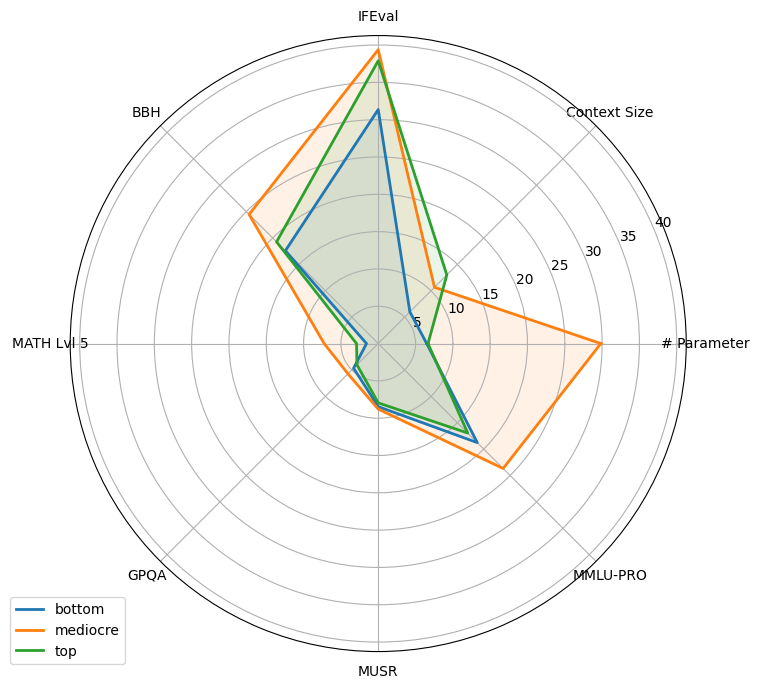

In [39]:
from math import pi

# Number of variables we're plotting
categories = list(df_aggr.columns)
N = len(categories)

# Create the angle of each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot each performer
for index, row in df_aggr.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=index)
    ax.fill(angles, values, alpha=0.1)

# Add the labels and legend
plt.xticks(angles[:-1], categories)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('./radar plot.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

In [40]:
df_aggr

,# Parameter,Context Size,IFEval,BBH,MATH Lvl 5,GPQA,MUSR,MMLU-PRO
Performer,,,,,,,,
bottom,6.500000,6.000000,31.355000,17.5925,1.5675,4.6700,8.455000,18.775000
mediocre,29.833333,10.666667,39.380833,24.4700,7.2450,5.7325,8.780833,23.673333
top,6.675000,13.000000,37.887500,19.2675,2.9075,4.0275,7.947500,16.965000


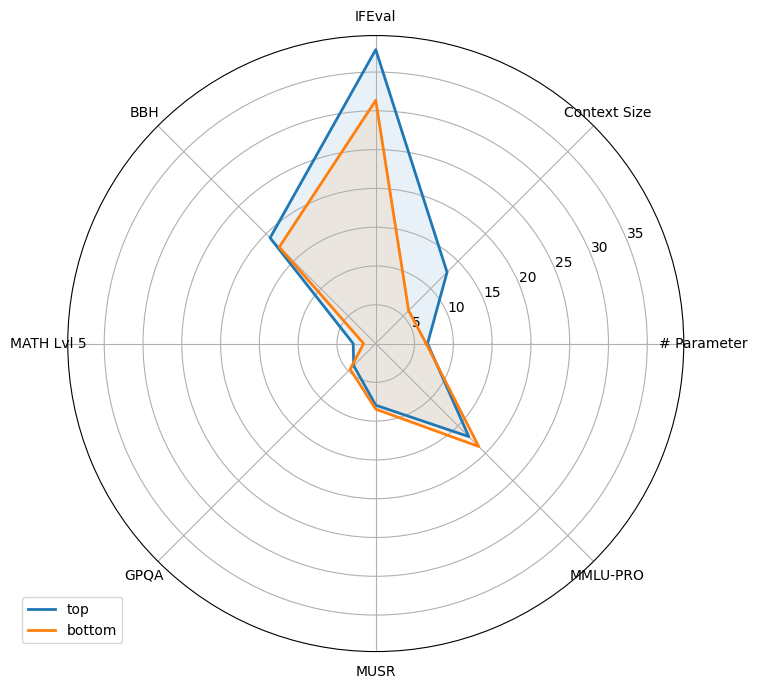

In [41]:

selected_df = df_aggr.loc[['top', 'bottom']]
# Number of variables we're plotting
categories = list(selected_df.columns)
N = len(categories)

# Create the angle of each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot each performer
for index, row in selected_df.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=index)
    ax.fill(angles, values, alpha=0.1)

# Add the labels and legend
plt.xticks(angles[:-1], categories)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('./radar plot.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

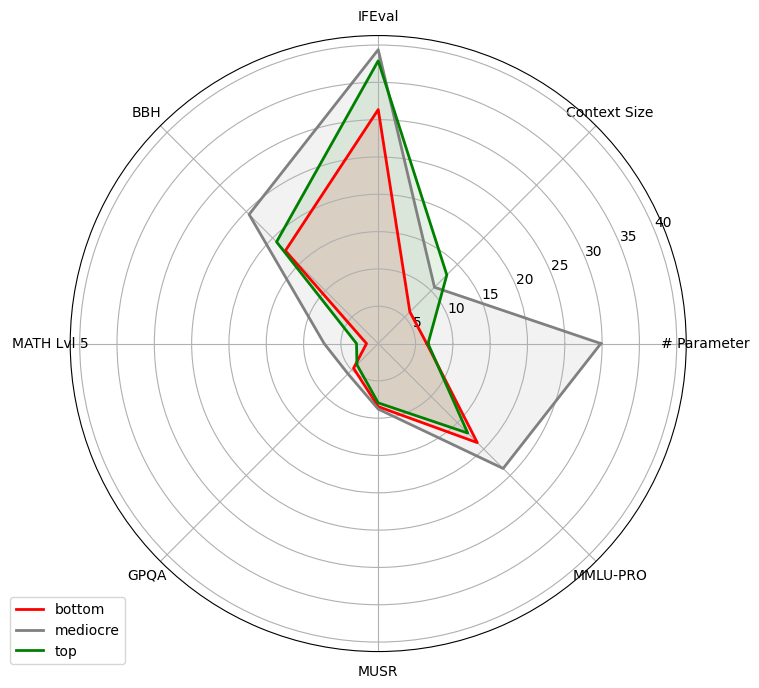

In [42]:
from math import pi
import matplotlib.pyplot as plt

# Number of variables we're plotting
categories = list(df_aggr.columns)
N = len(categories)

# Create the angle of each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Define colors for each category
color_map = {
    'top': 'green',
    'mediocre': 'grey',
    'bottom': 'red'
}

# Plot each performer with specified colors
for index, row in df_aggr.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=index, color=color_map[index])
    ax.fill(angles, values, alpha=0.1, color=color_map[index])

# Add the labels and legend
plt.xticks(angles[:-1], categories)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('./radar_plot.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()
